## UCI SECOM(Linear Regression)-2
#### Data preprocessing
- 결측값50%넘는 열 삭제후 남은 결측값은 fillna함수의 method='ffill'&'bfill'을 이용해 채운다. 
- 이후 고유치 개수가 1인 열을 제거한다

In [27]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
# Read the data
data = pd.read_csv('uci-secom.csv')

In [29]:
# Data shape 및 상위 5개 열 보기
print(data.shape)
data.head()

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [30]:
# include='all'하면 입력의 모든 열이 데이터 출력으로 포함, 기본값인 'None'은 수치데이터가 있는 열만 결과에 포함
data.describe(include='all')

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,NaN,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,NaN,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,NaN,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000


## 1. Data Preprocessing

In [31]:
# Check data's Null values
data.isnull().any().any()

True

In [32]:
# Column에서 결측값의 percentage를 나타내는 함수 정의
# pd.concat->데이터 프레임 결합
# df.shape[0]은 데이터 전체 열의 개수
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [33]:
df_na = null_values(data)
df_na

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
...,...,...
456,1,0.063816
218,1,0.063816
356,1,0.063816
457,1,0.063816


In [34]:
# 결측값의 비율이 50% 넘는 열 개수 확인
df_na = df_na[df_na["Percentage (%)"] > 50]
df_na
df_na.shape

(28, 2)

In [35]:
# 결측값의 비율이 50% 넘는 열 확인
df_na.index

Index(['292', '293', '157', '158', '358', '85', '492', '220', '518', '246',
       '245', '516', '517', '110', '384', '382', '383', '109', '244', '111',
       '580', '578', '581', '579', '73', '72', '345', '346'],
      dtype='object')

In [36]:
# 결측값의 비율이 50% 넘는 열 삭제
data = data.drop(axis=1, columns=df_na.index)
data.shape

(1567, 564)

In [37]:
# 나머지 열의 결측값은  나머지는 fillna의 method='ffill'과 'bfill'을 통해 결측값을 앞뒤 방향으로 채운다.
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4333,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [38]:
data.isnull().any().any()

False

In [39]:
# nunique() 함수를 써서 5열의 고유치 개수를 확인
data["5"].nunique()

1

In [40]:
# Column '5'와 같이 고유값이 1개인 열을 저장하는 unique_columns함수 생성
def unique_columns(df):
    uni_col_list = []
    for column in df.columns:
        if df[column].nunique() == 1:
            uni_col_list.append(column)
    return uni_col_list

In [41]:
# 고유치 개수가 1개인 열의 개수 확인
len(unique_columns(data))

116

In [42]:
data.shape

(1567, 564)

In [43]:
data = data.drop(axis=1, columns=unique_columns(data))
data.shape

(1567, 448)

### Data Scaling
- 1. StandardScaler 
- 2. PCA 차원축소

In [44]:
# Train/Test Dataset split을 위해 Dataset을 Data/Target값으로 분리
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [45]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample  = SMOTE(random_state=1).fit_sample(X, y.values.ravel())

(1) StandardScaler: 각 feature의 평균을 0, 분산을 1로 변경, 모든 feature들이 같은 Scale을 갖게된다.

In [46]:
# 먼저 데이터를 학습용과 테스트용으로 분할
# test_test_split의 random_state를 제외한 다른 하이퍼파라미터는 default로 두기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state=50)

#### ※ Scaler를 사용하기 전에 주의할 점
scaler는 fit과 transform 매서드를 지니고 있다. fit 매서드로 데이터 변환을 학습하고, transform 매서드로 실제 데이터의 스케일을 조정한다.
이때! fit 매서드는 학습용 데이터에만 적용해야한다. 그 후 transform 매서드를 학습용 데이터와 테스트 데이터에 적용한다.

In [47]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
X_sc = sc.fit_transform(X)
X_train_sc = sc.fit_transform(X_train)
print('Features Min value before Scale : \n {}'. format(X_train.min(axis=0)))
print('Features Max value before Scale : \n {}'. format(X_train.max(axis=0)))
print('Features Min value after Scale : \n {}'. format(X_train_sc.min(axis=0)))
print('Features Max value after Scale : \n {}'. format(X_train_sc.max(axis=0)))
X_test_sc = sc.transform(X_test)

Features Min value before Scale : 
 0      2770.4000
1      2158.7500
2      2060.6600
3         0.0000
4         0.6815
         ...    
585       1.2845
586      -0.0060
587       0.0032
588       0.0010
589       0.0000
Length: 446, dtype: float64
Features Max value before Scale : 
 0      3356.3500
1      2846.4400
2      2315.2667
3      3715.0417
4      1112.4728
         ...    
585      99.3032
586       0.1028
587       0.0799
588       0.0286
589     737.3048
Length: 446, dtype: float64
Features Min value after Scale : 
 [-3.30731663e+00 -4.59571275e+00 -5.21938515e+00 -3.65398101e+00
 -4.94427401e-02 -3.46324375e+00 -2.00457529e+01 -4.38977089e+00
 -3.87362655e+00 -4.05128807e+00 -2.76524610e+01 -6.22678393e+00
 -2.49560932e+00 -2.01573721e+00 -9.08130583e-01 -3.73845933e+01
 -8.42145819e+00 -1.56319748e+01 -1.50675439e+01 -2.09745911e+00
 -7.36148101e+00 -4.56610732e+00 -5.62185877e+00 -5.64327483e+00
 -7.25048781e+00 -4.62743147e+00 -2.97351791e+00 -4.32672173e+00
 -4.7565

(2) PCA차원축소

- 많은 feature로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
-  일반적으로 차원이 증가할수록, 즉 feature가 많아질수록 예측 신뢰도가 떨어지고, 과적합(overfitting)이 발생하고, 개별 feature간의 상관관계가 높을 가능성이 있음

In [48]:
from sklearn.decomposition import PCA
# Initializing PCA and fitting
# Choose minimum number of PCA features that 85% variance is retained to avoid overfitting
pca = PCA(0.85)
X_sc_pca = pca.fit_transform(X_sc) # StandardScaler에서 학습용 데이터에 적용한 것처럼 fit과 transform 둘 다를 적용해줘야 하네~~??
X_sc_pca_pd = pd.DataFrame(data = X_sc_pca)

In [49]:
# Transform train and test datasets
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print('PCA차원 축소 이전 X_train:', X_train_sc.shape)
print('PCA차원 축소 이전 X_test:', X_test_sc.shape)
print('PCA차원 축소 이후 X_train:', X_train_pca.shape)
print('PCA차원 축소 이후 X_test:', X_test_pca.shape)

PCA차원 축소 이전 X_train: (2194, 446)
PCA차원 축소 이전 X_test: (732, 446)
PCA차원 축소 이후 X_train: (2194, 105)
PCA차원 축소 이후 X_test: (732, 105)


PCA차원 축소로 Feature가 565개에서 99개로 줄어 차원이 감소 됐음을 확인 할 수 있다.

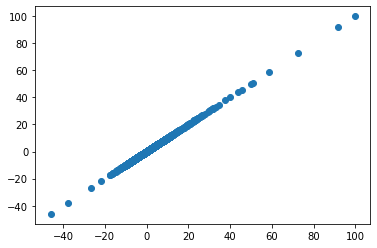

In [50]:
plt.scatter(X_sc_pca[:,1:-1], X_sc_pca[:,1:-1]) #해석 필요

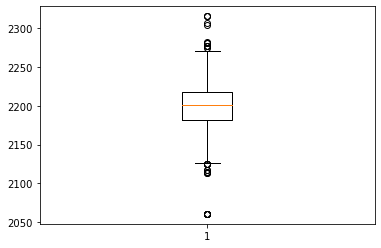

In [51]:
plt.boxplot(data['2'])

plt.show()

## 2. Data Modeling

### ✔ 교차검증
- 보통은 train set 으로 모델을 훈련, test set으로 모델을 검증한다.고정된 test set을 통해 모델의 성능을 검증하고 수정하는 과정을 반복하면, 결국 내가 만든 모델은 test set 에만 잘 동작하는 모델이 된다.즉, test set에 과적합(overfitting)하게 되므로, 다른 실제 데이터를 가져와 예측을 수행하면 엉망인 결과가 나와버리게 된다.
- 교차 검증은 train set을 train set + validation set으로 분리한 뒤, validation set을 사용해 검증하는 방식이다.

### ✔ L1규제, L2규제
- L1 규제 : W의 절댓값에 대해 패널티를 부여 / L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환 ➜ 라쏘 회귀
- L2 규제 : W의 제곱에 대한 패널티를 부여하는 방식 ➜ 릿지 회귀

### ✔ 릿지 회귀
- 주요 생성 파라미터 : alpha(릿지 회귀의 alpha L2 규제 계수)
- alpha 값이 커질수록 회귀 계수 값은 작아짐 **BUT** 회귀 계수를 0으로 만들지는 않는다

### ✔ 라쏘 회귀
- 회귀 계수의 크기를 감소시키는 L2 규제와는 달리, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함
- 주요 생성 파라키터 : alpha(alpha L1 규제 계수)
- alpha의 크기가 증가함에 따라 회귀 계수가 0이 되기도 함

### ✔ 엘라스틱넷 회귀
- L2와 L1 규제를 결합한 회귀
- 최소화하는 W를 찾는것이 목표
- 휘귀 계수를 0으로 만드는 성향이 강한 라쏘 회귀에 이를 완화하기 위해 L2 규제 추가
- 단점 : 시간이 오래 걸림

📍 **회귀의 경우 MSE 값이 낮을수록 좋은 회귀 모델이다.** 📍

### 2.1 라쏘 회귀

In [52]:
#inport libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')

In [53]:
lasso = Lasso(alpha=0.1, random_state=50)
lasso.fit(X_train_pca,y_train)

# 회귀 계수 출력
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00264025  0.04296258  0.         -0.01253332 -0.01020766  0.
 -0.         -0.00400001  0.01764707  0.04113972  0.05081445 -0.03933769
  0.0206224  -0.0001097  -0.          0.00337112 -0.          0.
 -0.00894485  0.         -0.         -0.00041275  0.02758694  0.02803752
  0.         -0.00121807 -0.00017724 -0.         -0.01965326  0.
 -0.          0.         -0.         -0.01950667  0.         -0.
 -0.01211241 -0.         -0.         -0.          0.00937241  0.
 -0.         -0.         -0.          0.          0.01752042 -0.
  0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.01163176  0.         -0.03733603 -0.          0.
  0.07886512 -0.         -0.00120202  0.          0.          0.
 -0.         -0.         -0.          0.00137958  0.         -0.00766898
 -0.00298857  0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0. 

In [54]:
# 회귀 계수 큰 값 순으로 정렬
coef = pd.Series(data=np.round(lasso.coef_,1), index=X_sc_pca_pd.columns)
coef.sort_values(ascending=False)

99     0.1
66     0.1
10     0.1
104    0.0
37    -0.0
      ... 
72    -0.0
73    -0.0
74    -0.0
75     0.0
0      0.0
Length: 105, dtype: float64

✅ **회귀 계수**
- 독립변수의 변화가 종속변수를 얼마나 변화시키는가?
- y=wx+b 식에서 w에 해당하는 값
- 회귀 계수가 클수록 종속변수에 미치는 영향, 관계의 정도가 커짐

In [55]:
y_pred = lasso.predict(X_test_pca)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [56]:
print("Accuracy : ", lasso.score(X_test_pca,y_test)*100)

Accuracy :  22.075816964418582


In [57]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("RMSE : ", rmse)

RMSE :  1.0108698845535304


In [58]:
neg_mse_scores = cross_val_score(lasso, X_test_pca, y_test, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [59]:
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-0.83 -0.81 -0.91 -0.83 -0.73]
5 folds의 개별 RMSE scores :  [0.91 0.9  0.95 0.91 0.86]
5 folds의 평균 RMSE : 0.906


### 2.2 릿지 회귀

In [60]:
ridge = Ridge(alpha=0.1, random_state=50)
ridge.fit(X_train_pca,y_train)

# 회귀 계수 출력
print ("Lasso model:", (ridge.coef_))

Lasso model: [ 0.00770722  0.04816534 -0.00225227 -0.01465522 -0.01912005  0.01031173
 -0.00428947 -0.01324531  0.03080844  0.04488454  0.05099245 -0.03999152
  0.03286733 -0.01052145  0.00148407  0.01574091 -0.0147568   0.01867148
 -0.03109854 -0.00761615  0.00121756 -0.01687491  0.03906681  0.046176
  0.0005009  -0.02495025 -0.02448257 -0.02309689 -0.03260212 -0.00607596
 -0.01938236  0.0214692  -0.01099014 -0.04776568  0.02044727 -0.00441214
 -0.0479289  -0.01322368 -0.00797429 -0.00521701  0.0395016   0.02009933
 -0.01456009 -0.00709643  0.00208346 -0.00320618  0.04861479 -0.0288786
  0.03469059 -0.00579561 -0.01148691  0.01550849 -0.01464196  0.02200936
 -0.00177196  0.02409477 -0.0317117   0.03165237  0.02230968  0.02105308
 -0.01946198  0.04374281  0.01274699 -0.06466315 -0.01153319  0.0045052
  0.10593602 -0.02724919 -0.04216394  0.01689974  0.04260261  0.02597761
 -0.00195623 -0.02445597 -0.03342841  0.05108113  0.0277786  -0.05844335
 -0.04433549  0.03183195  0.01358517  0.00

In [61]:
# 회귀 계수 큰 값 순으로 정렬
coef = pd.Series(data=np.round(ridge.coef_,1), index=X_sc_pca_pd.columns)
coef.sort_values(ascending=False)

75     0.1
101    0.1
10     0.1
99     0.1
66     0.1
      ... 
86    -0.1
63    -0.1
90    -0.1
77    -0.1
102   -0.1
Length: 105, dtype: float64

In [62]:
y_pred = ridge.predict(X_test_pca)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [63]:
print("Accuracy : ", ridge.score(X_test_pca,y_test)*100)

Accuracy :  31.374180435658026


In [64]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("RMSE : ", rmse)

RMSE :  0.943774540085534


In [65]:
neg_mse_scores = cross_val_score(ridge, X_test_pca, y_test, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [66]:
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-0.84 -1.08 -1.95 -0.82 -0.72]
5 folds의 개별 RMSE scores :  [0.92 1.04 1.4  0.91 0.85]
5 folds의 평균 RMSE : 1.022


### 2.3 엘라스틱넷 회귀

In [67]:
elasticnet = ElasticNet(alpha=0.1, random_state=50)
elasticnet.fit(X_train_pca,y_train)

ElasticNet(alpha=0.1, random_state=50)

In [68]:
y_pred = elasticnet.predict(X_test_pca)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [69]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("RMSE : ", rmse)

RMSE :  0.9609876522409447


In [70]:
neg_mse_scores = cross_val_score(elasticnet, X_test_pca, y_test, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [71]:
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-0.79 -0.75 -0.81 -0.78 -0.64]
5 folds의 개별 RMSE scores :  [0.89 0.87 0.9  0.88 0.8 ]
5 folds의 평균 RMSE : 0.867


📍 **엘라스틱넷 회귀 모델의 RMSE 값이 가장 낮음 ➜ 3개의 회귀 모델 중 가장 좋은 모델** 📍

### 📌결론 : 전처리 방법1(결측값이 900개가 넘는 칼럼은 삭제 후 나머지 값들은 0으로 대체)이 더 좋은 성능을 가진다.